In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [48]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
data.shape

(200, 5)

In [50]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [51]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


##### Spending score vs Annual Income and Age vs Spending Score is a safe bet for clustering

## All Column Distributions

### *Customer Age Distribution*

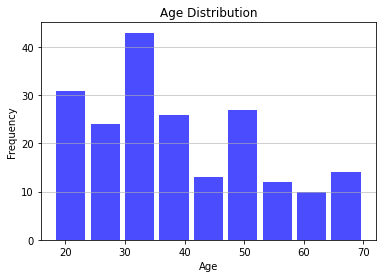

In [52]:
n, bins, patches = plt.hist(x=data['Age'], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
maxfreq = n.max()


### *Customer Age Groups for Quick Selection*

In [53]:
#age_groups
age_range18_25 = data.Age[(data.Age >= 18) & (data.Age <= 26)]
age_range26_35 = data.Age[(data.Age >= 26) & (data.Age <= 36)]
age_range36_45 = data.Age[(data.Age >= 36) & (data.Age <= 46)]
age_range46_55 = data.Age[(data.Age >= 46) & (data.Age <= 56)]
age_range_above_55 = data.Age[data.Age >= 56]

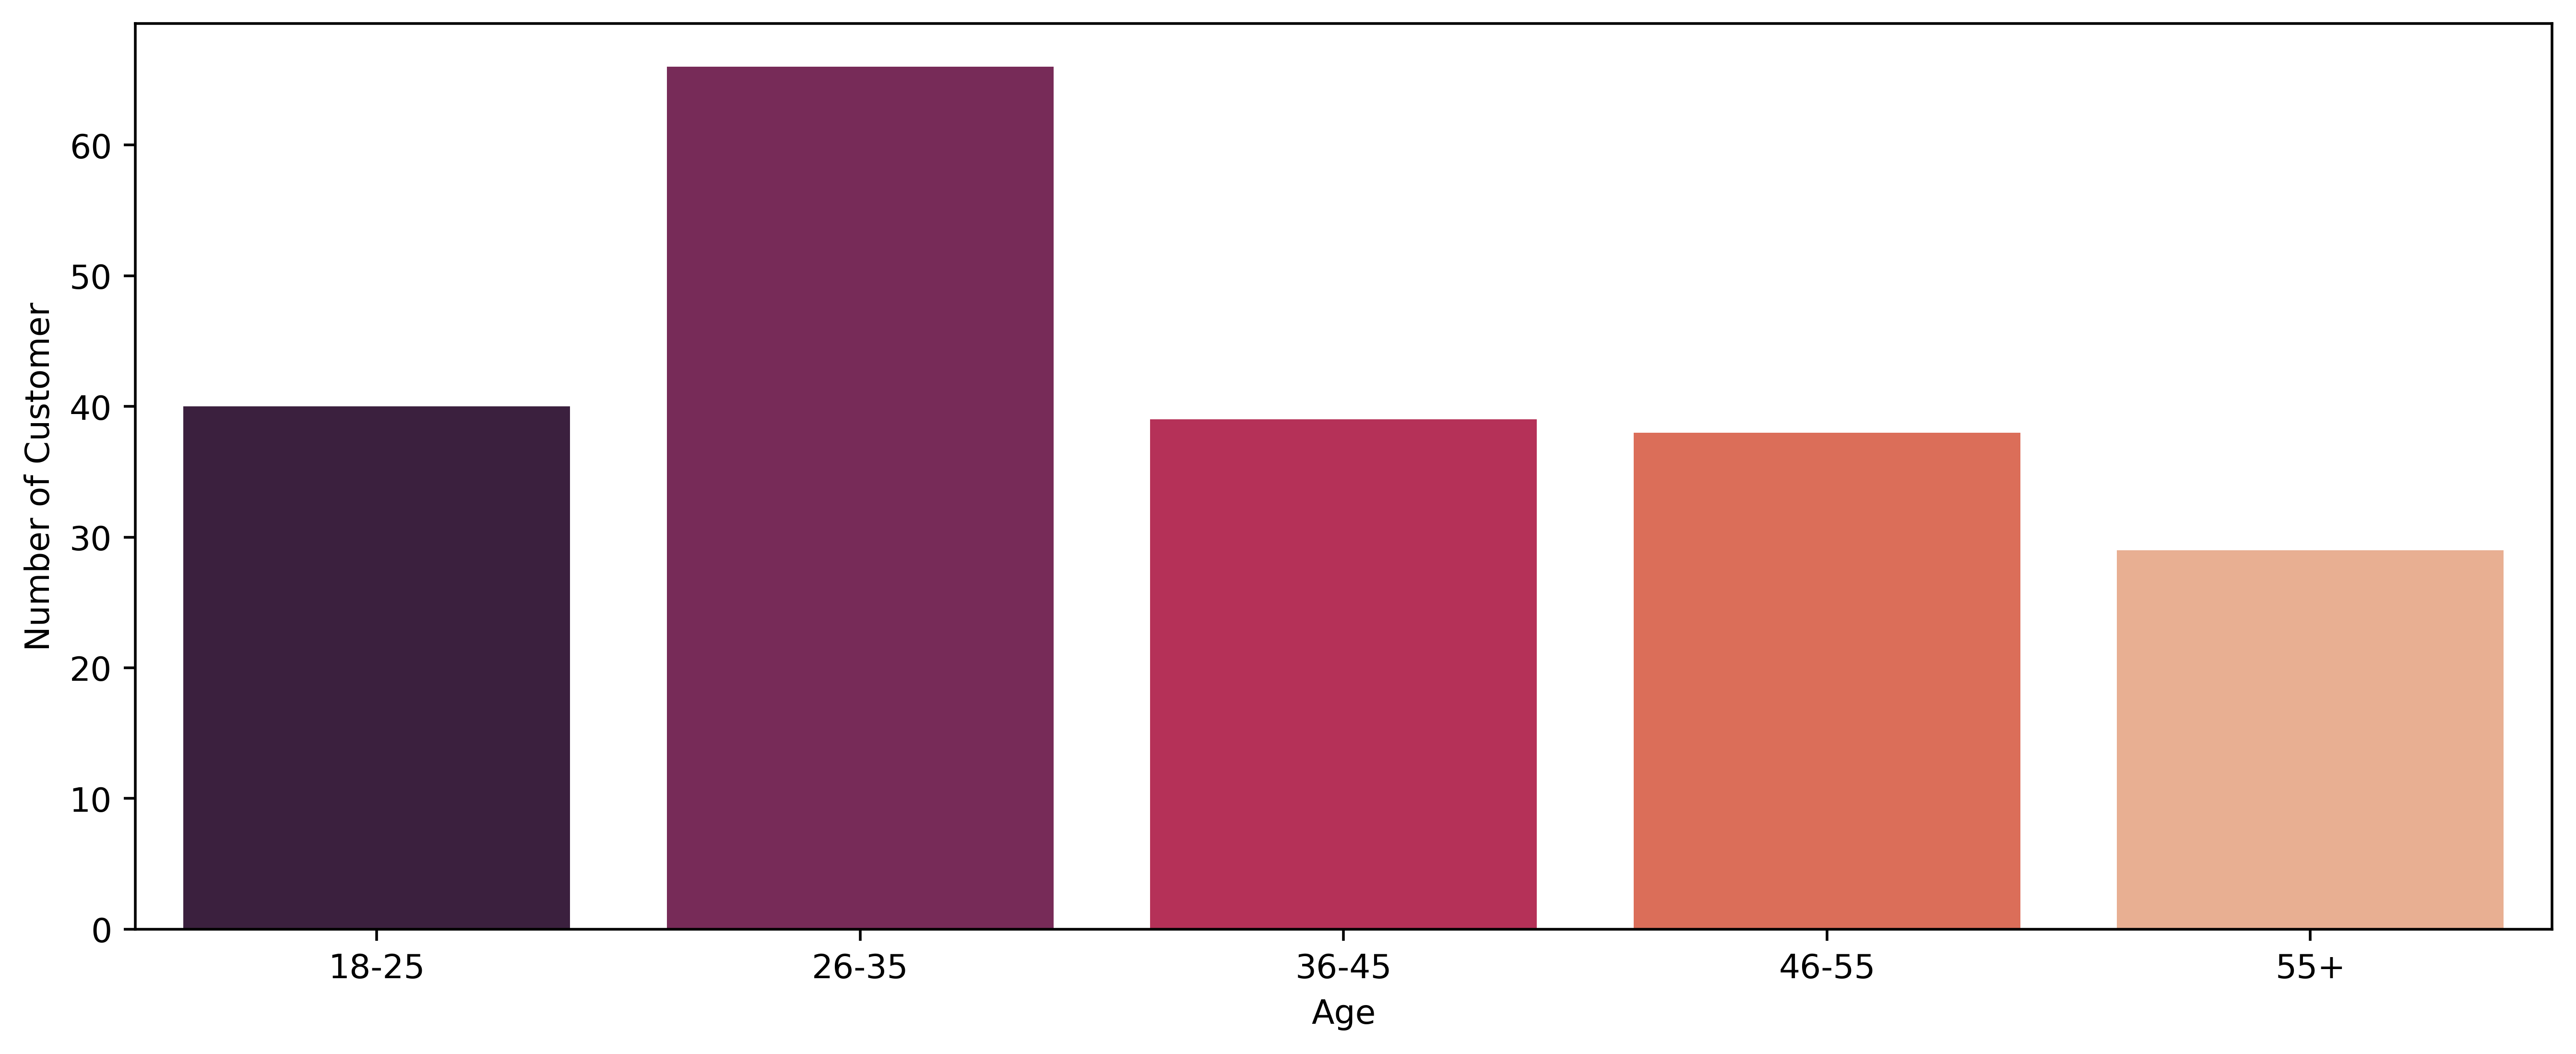

In [54]:
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age_range18_25.values),len(age_range26_35.values),len(age_range36_45.values),
     len(age_range46_55.values),len(age_range_above_55.values)]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age_range18_25.values),len(age_range26_35.values),len(age_range36_45.values)
     ,len(age_range46_55.values),len(age_range_above_55.values)]

plt.figure(figsize=(13,5), dpi = 500)
sns.barplot(x=x, y=y, palette="rocket")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### *Gender Percentage*

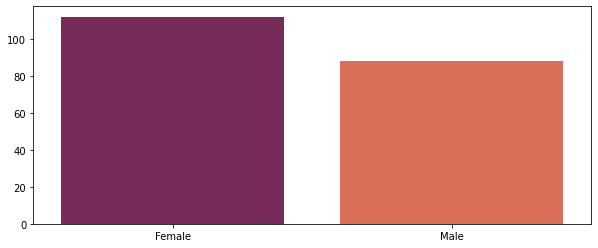

In [55]:
#checking gender percentage

gender_percentage = data.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette = 'rocket')
plt.show()


### *Spending Scores Distribution*

In [56]:
SSD1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
SSD21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
SSD41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
SSD61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
SSD81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

Spending_Scores_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
Spending_Scores_y = [len(SSD1_20.values), len(SSD21_40.values), len(SSD41_60.values), len(SSD61_80.values), 
                     len(SSD81_100.values)]

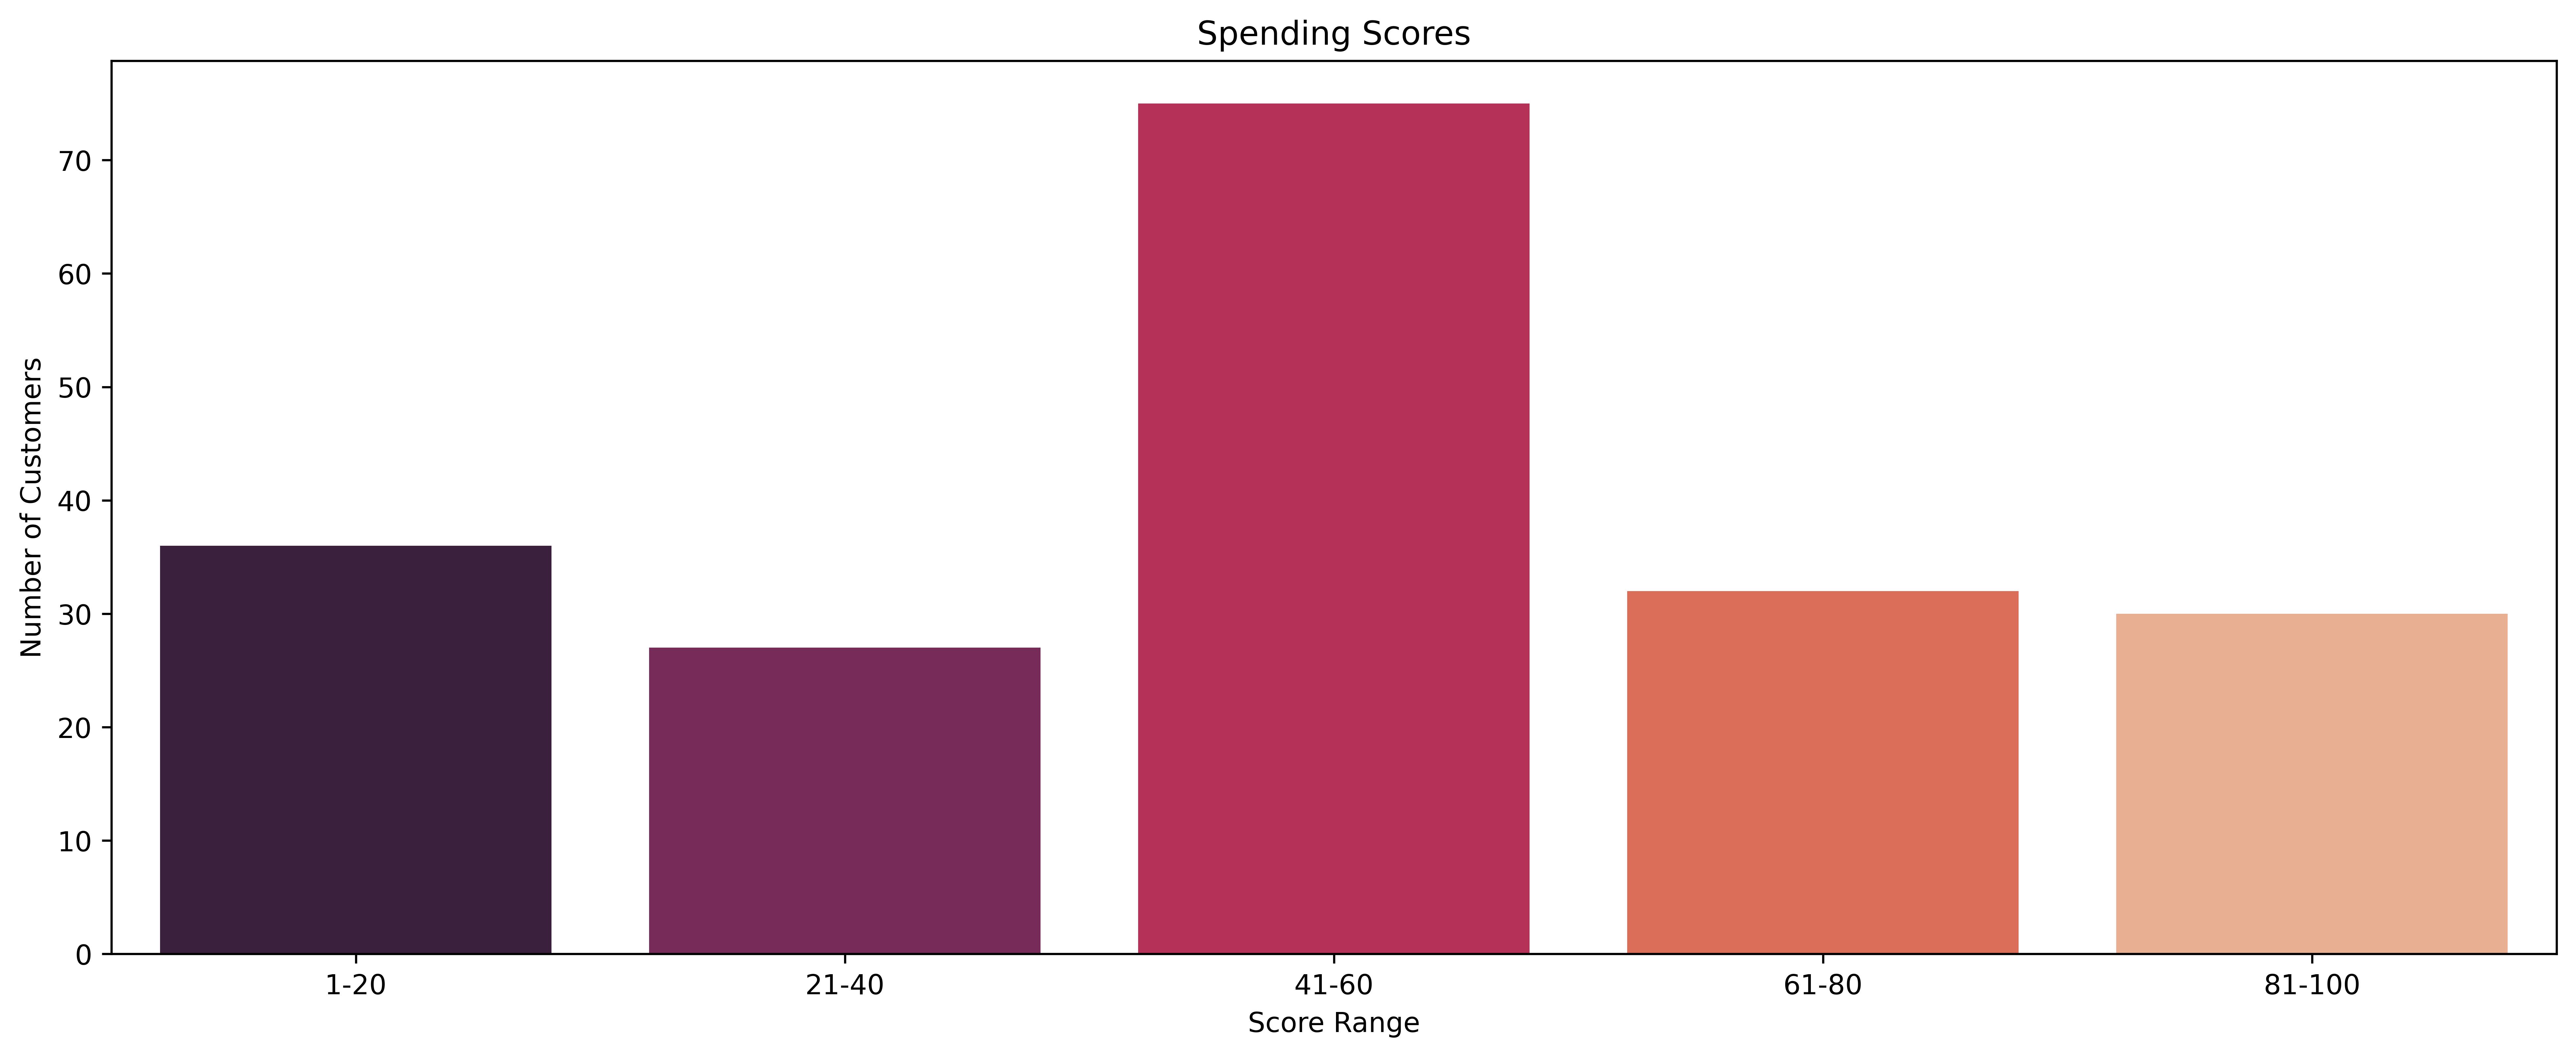

In [57]:
plt.figure(figsize=(16,6), dpi = 600)
sns.barplot(x= Spending_Scores_x, y= Spending_Scores_y, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score Range")
plt.ylabel("Number of Customers")
plt.show()

### *Annual Income Distribution*

In [58]:
AI0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
AI31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
AI61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
AI91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
AI121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

AIx = ["$ 0 - 30k", "$ 31k - 60k", "$ 61k - 90k", "$ 91k - 120k", "$ 121k - 150k"]
AIy = [len(AI0_30.values), len(AI31_60.values), len(AI61_90.values), len(AI91_120.values), len(AI121_150.values)]

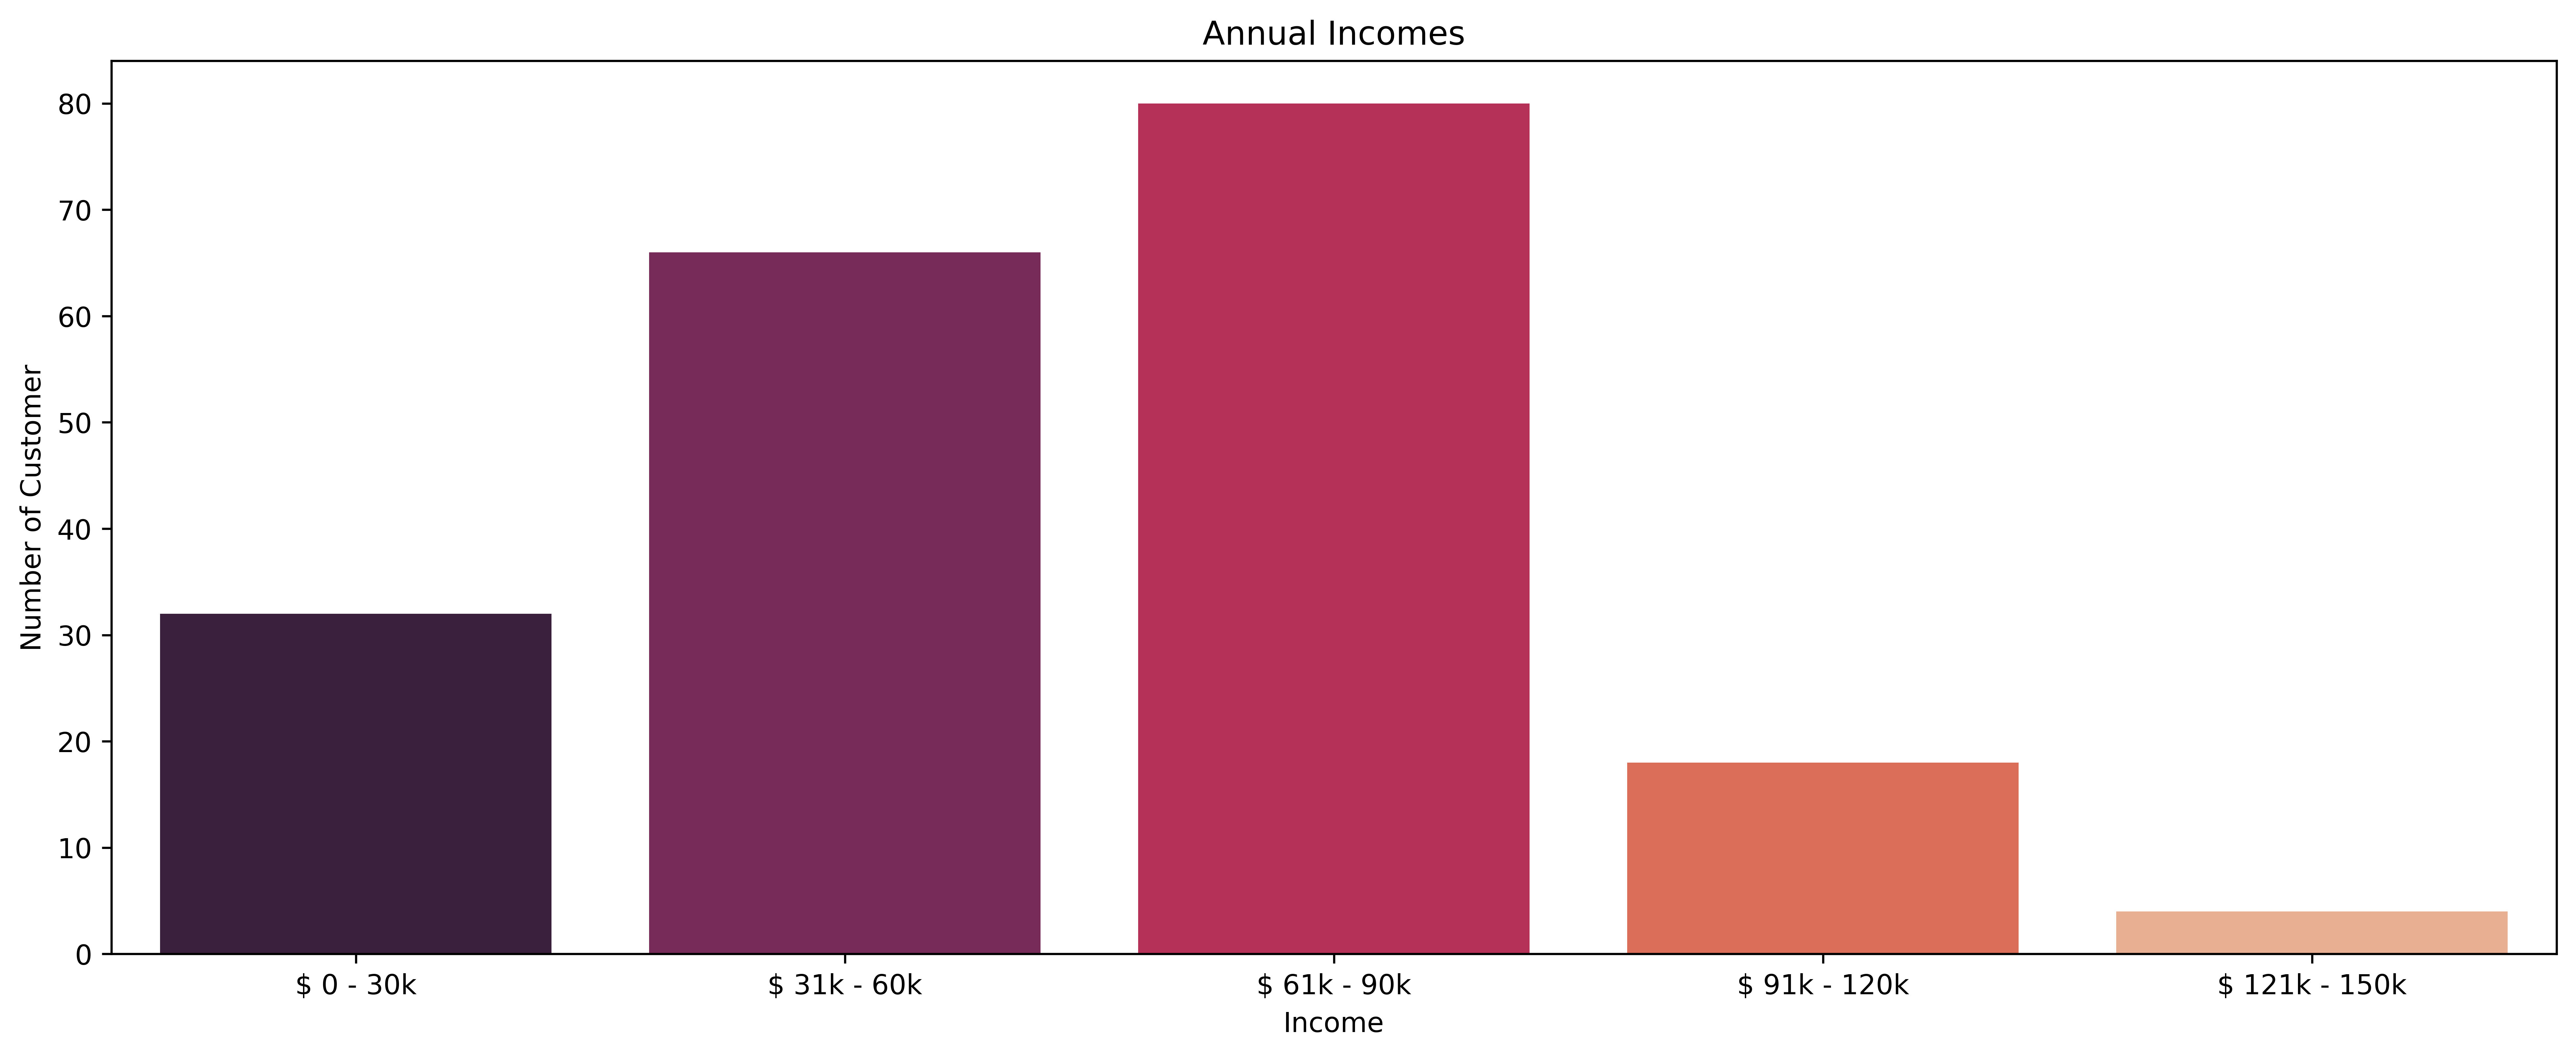

In [59]:
plt.figure(figsize=(16,6), dpi = 600)
sns.barplot(x= AIx, y= AIy, palette="rocket")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### Gender and Age Distribution

In [60]:
#converting gender categorical value to numerical label 
data_gender = pd.get_dummies(data['Gender'])
data_gender

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


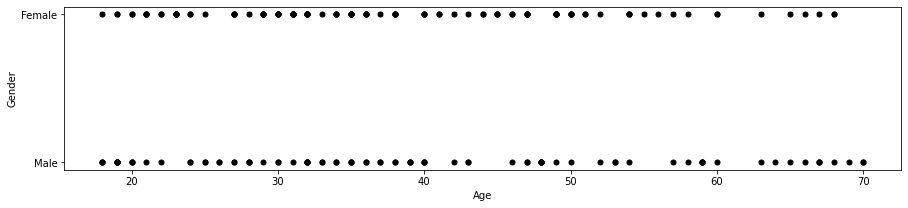

In [61]:
fig, ax = plt.subplots(figsize=(15,3))

plt.scatter(data['Age'], data['Gender'], s=25, color = 'black')
plt.xlabel('Age')
plt.ylabel('Gender')

plt.show()

In [62]:
#Shuffling data so that therw won't be any uneccesaary pattern pickup

data = data.sample(frac=1).reset_index(drop=True)

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,9,Male,64,19,3
1,66,Male,18,48,59
2,29,Female,40,29,31
3,173,Male,36,87,10
4,41,Female,65,38,35


-------------------------------------------------------------------------------------------------------------------------------

### Spending Scores vs Annual Income

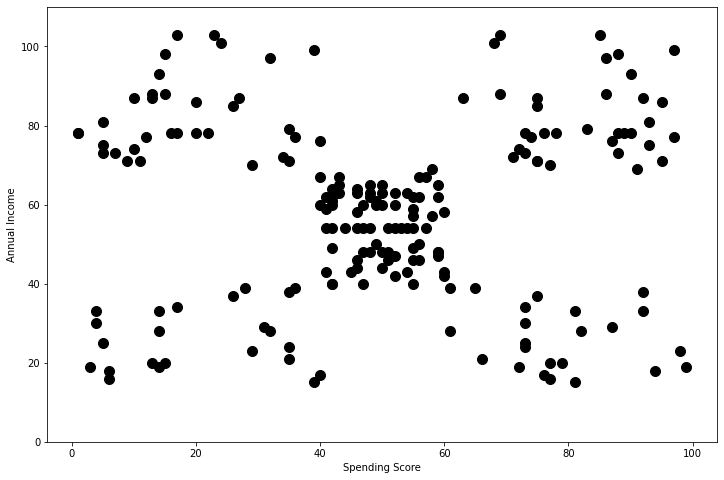

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], s=100, color = 'black')
plt.ylim(0,110)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

plt.show()

#### *Comment:*
#### Taking a rough look, I can say there are around 5 clusters, by that we can say K=5 for this given customers dataset
##### Now by checking using Elbow Method to get the optimal value of K

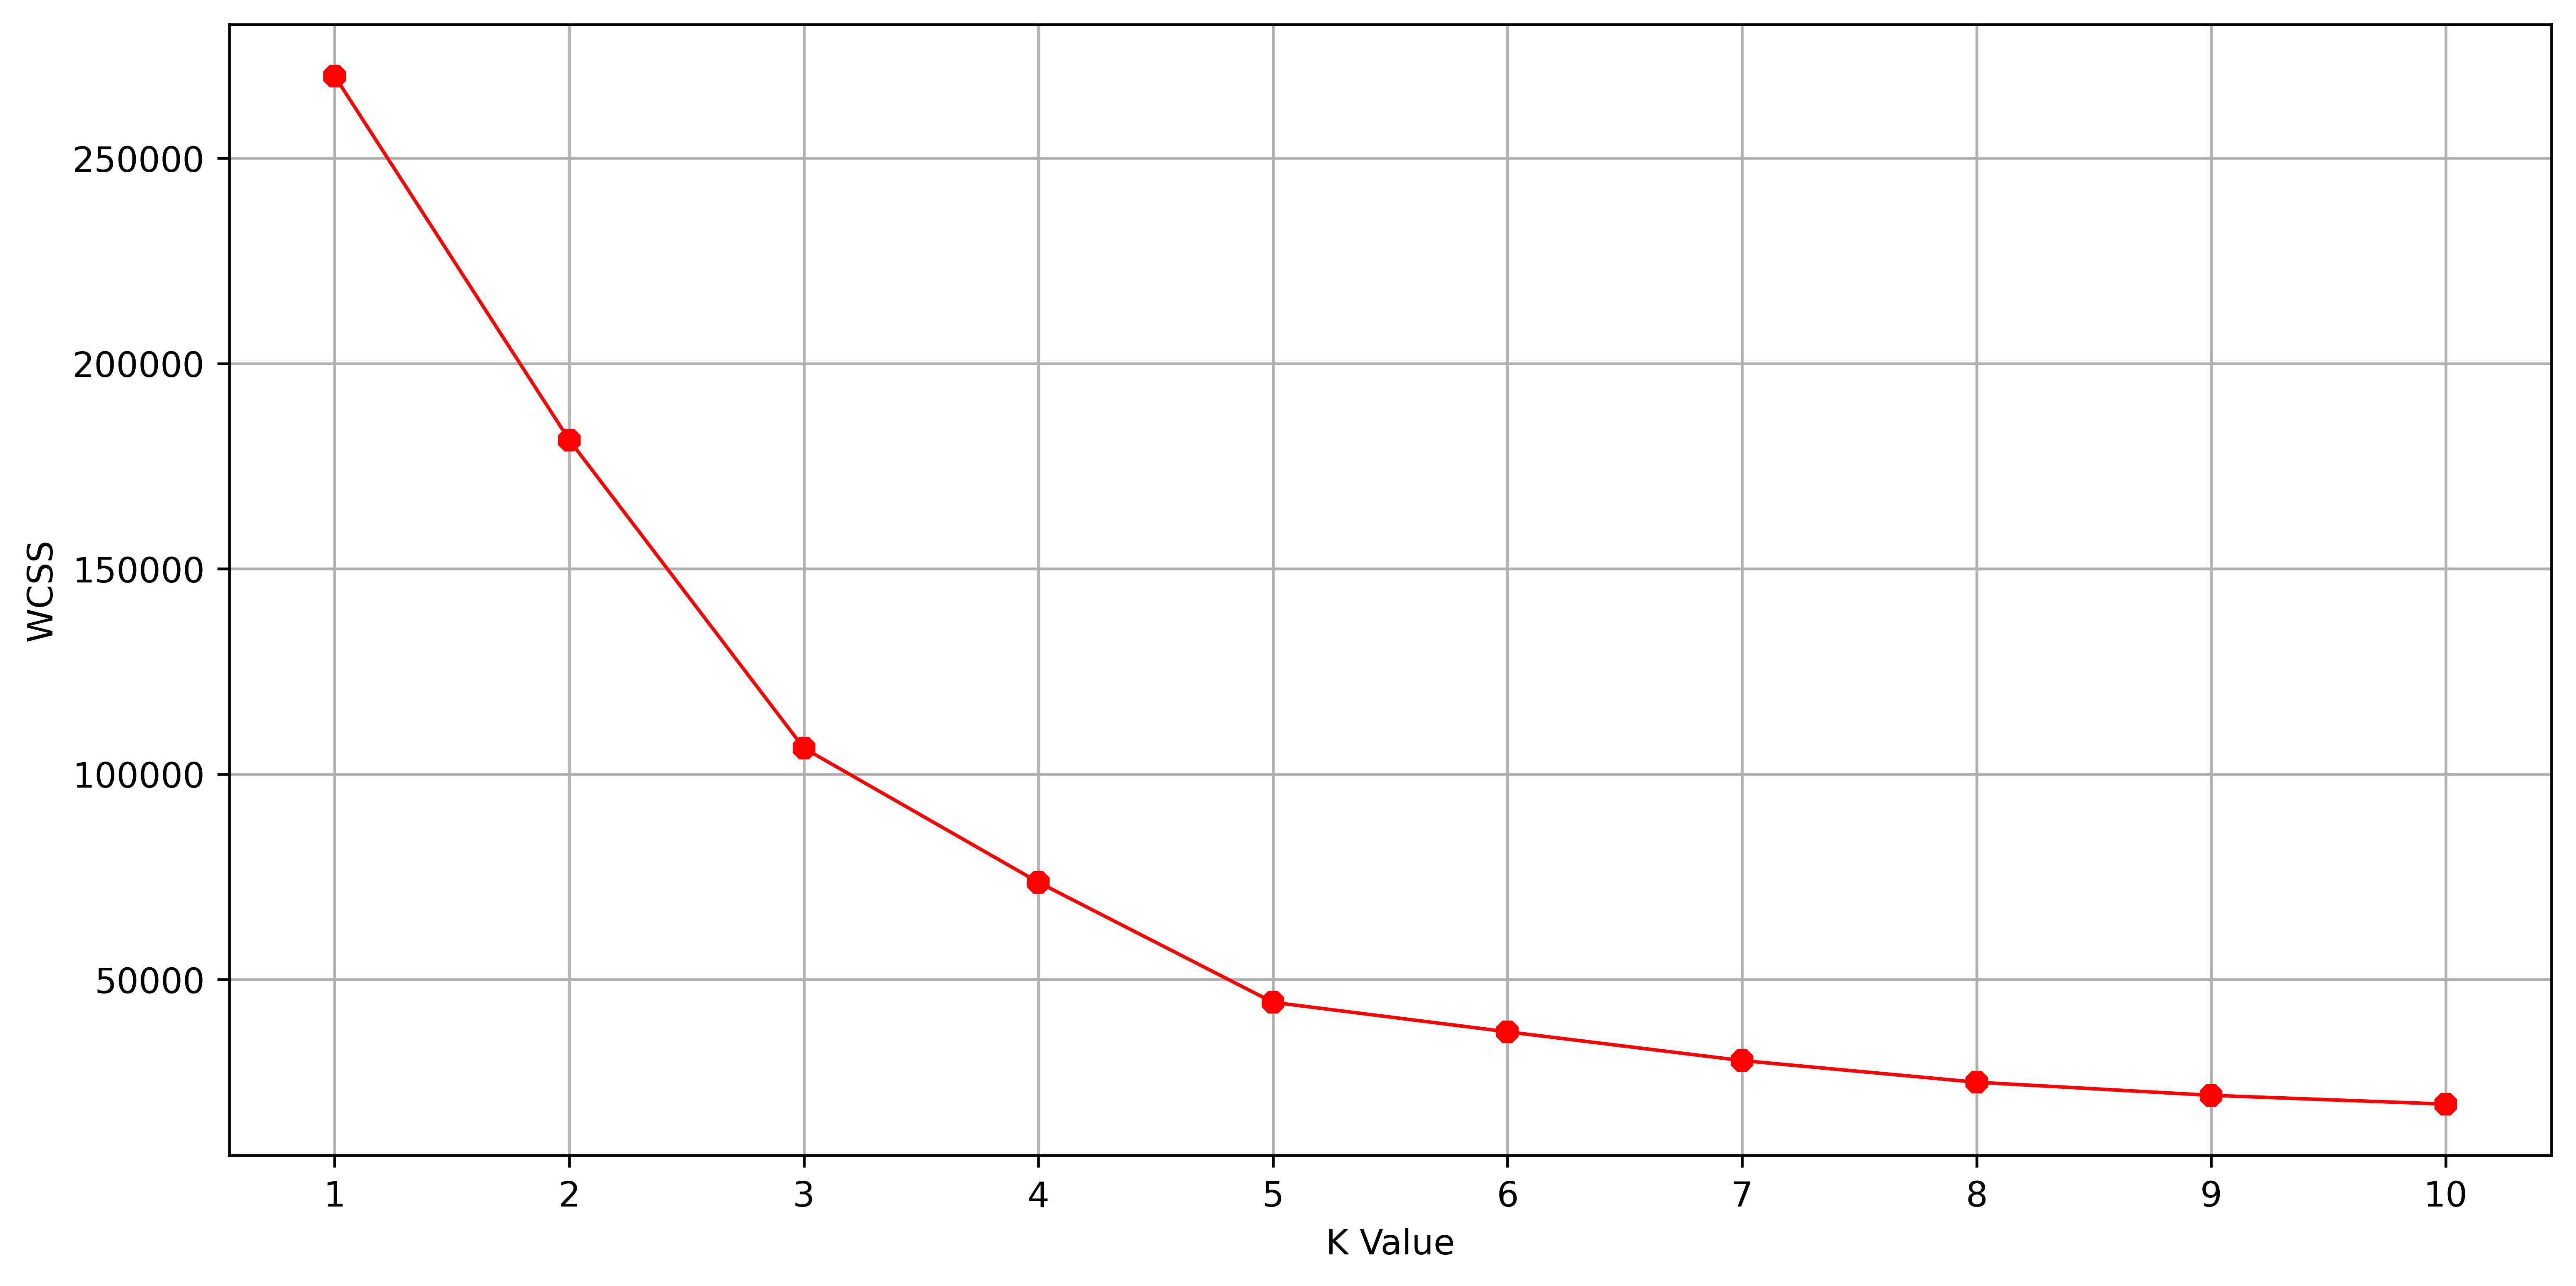

In [64]:
from sklearn.cluster import KMeans
wcss = []
#Assuming for this the value of K stays in or between 1 and 11
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(data.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6), dpi = 600)    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [65]:
#From the Elbow graph, the optimal value for K is 5
data_2D = data[['Annual Income (k$)', 'Spending Score (1-100)']]
km = KMeans(n_clusters=5)
#Fitting the input data
km.fit(data_2D)
#predicting the labels of the input data
y_pred=km.predict(data_2D)
#adding the labels to a column named label
data["klabel"] = y_pred
#The new dataframe with the clustering done
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),klabel
0,9,Male,64,19,3,4
1,66,Male,18,48,59,0
2,29,Female,40,29,31,4
3,173,Male,36,87,10,2
4,41,Female,65,38,35,4


In [66]:
#Silhouette score is high for K=5
from sklearn import metrics
print("Silhouette_score: ", metrics.silhouette_score(data.iloc[:,3:], y_pred))

Silhouette_score:  0.5553105776710252


#### Plotting Scaterplot of Clusters With Labels Marked

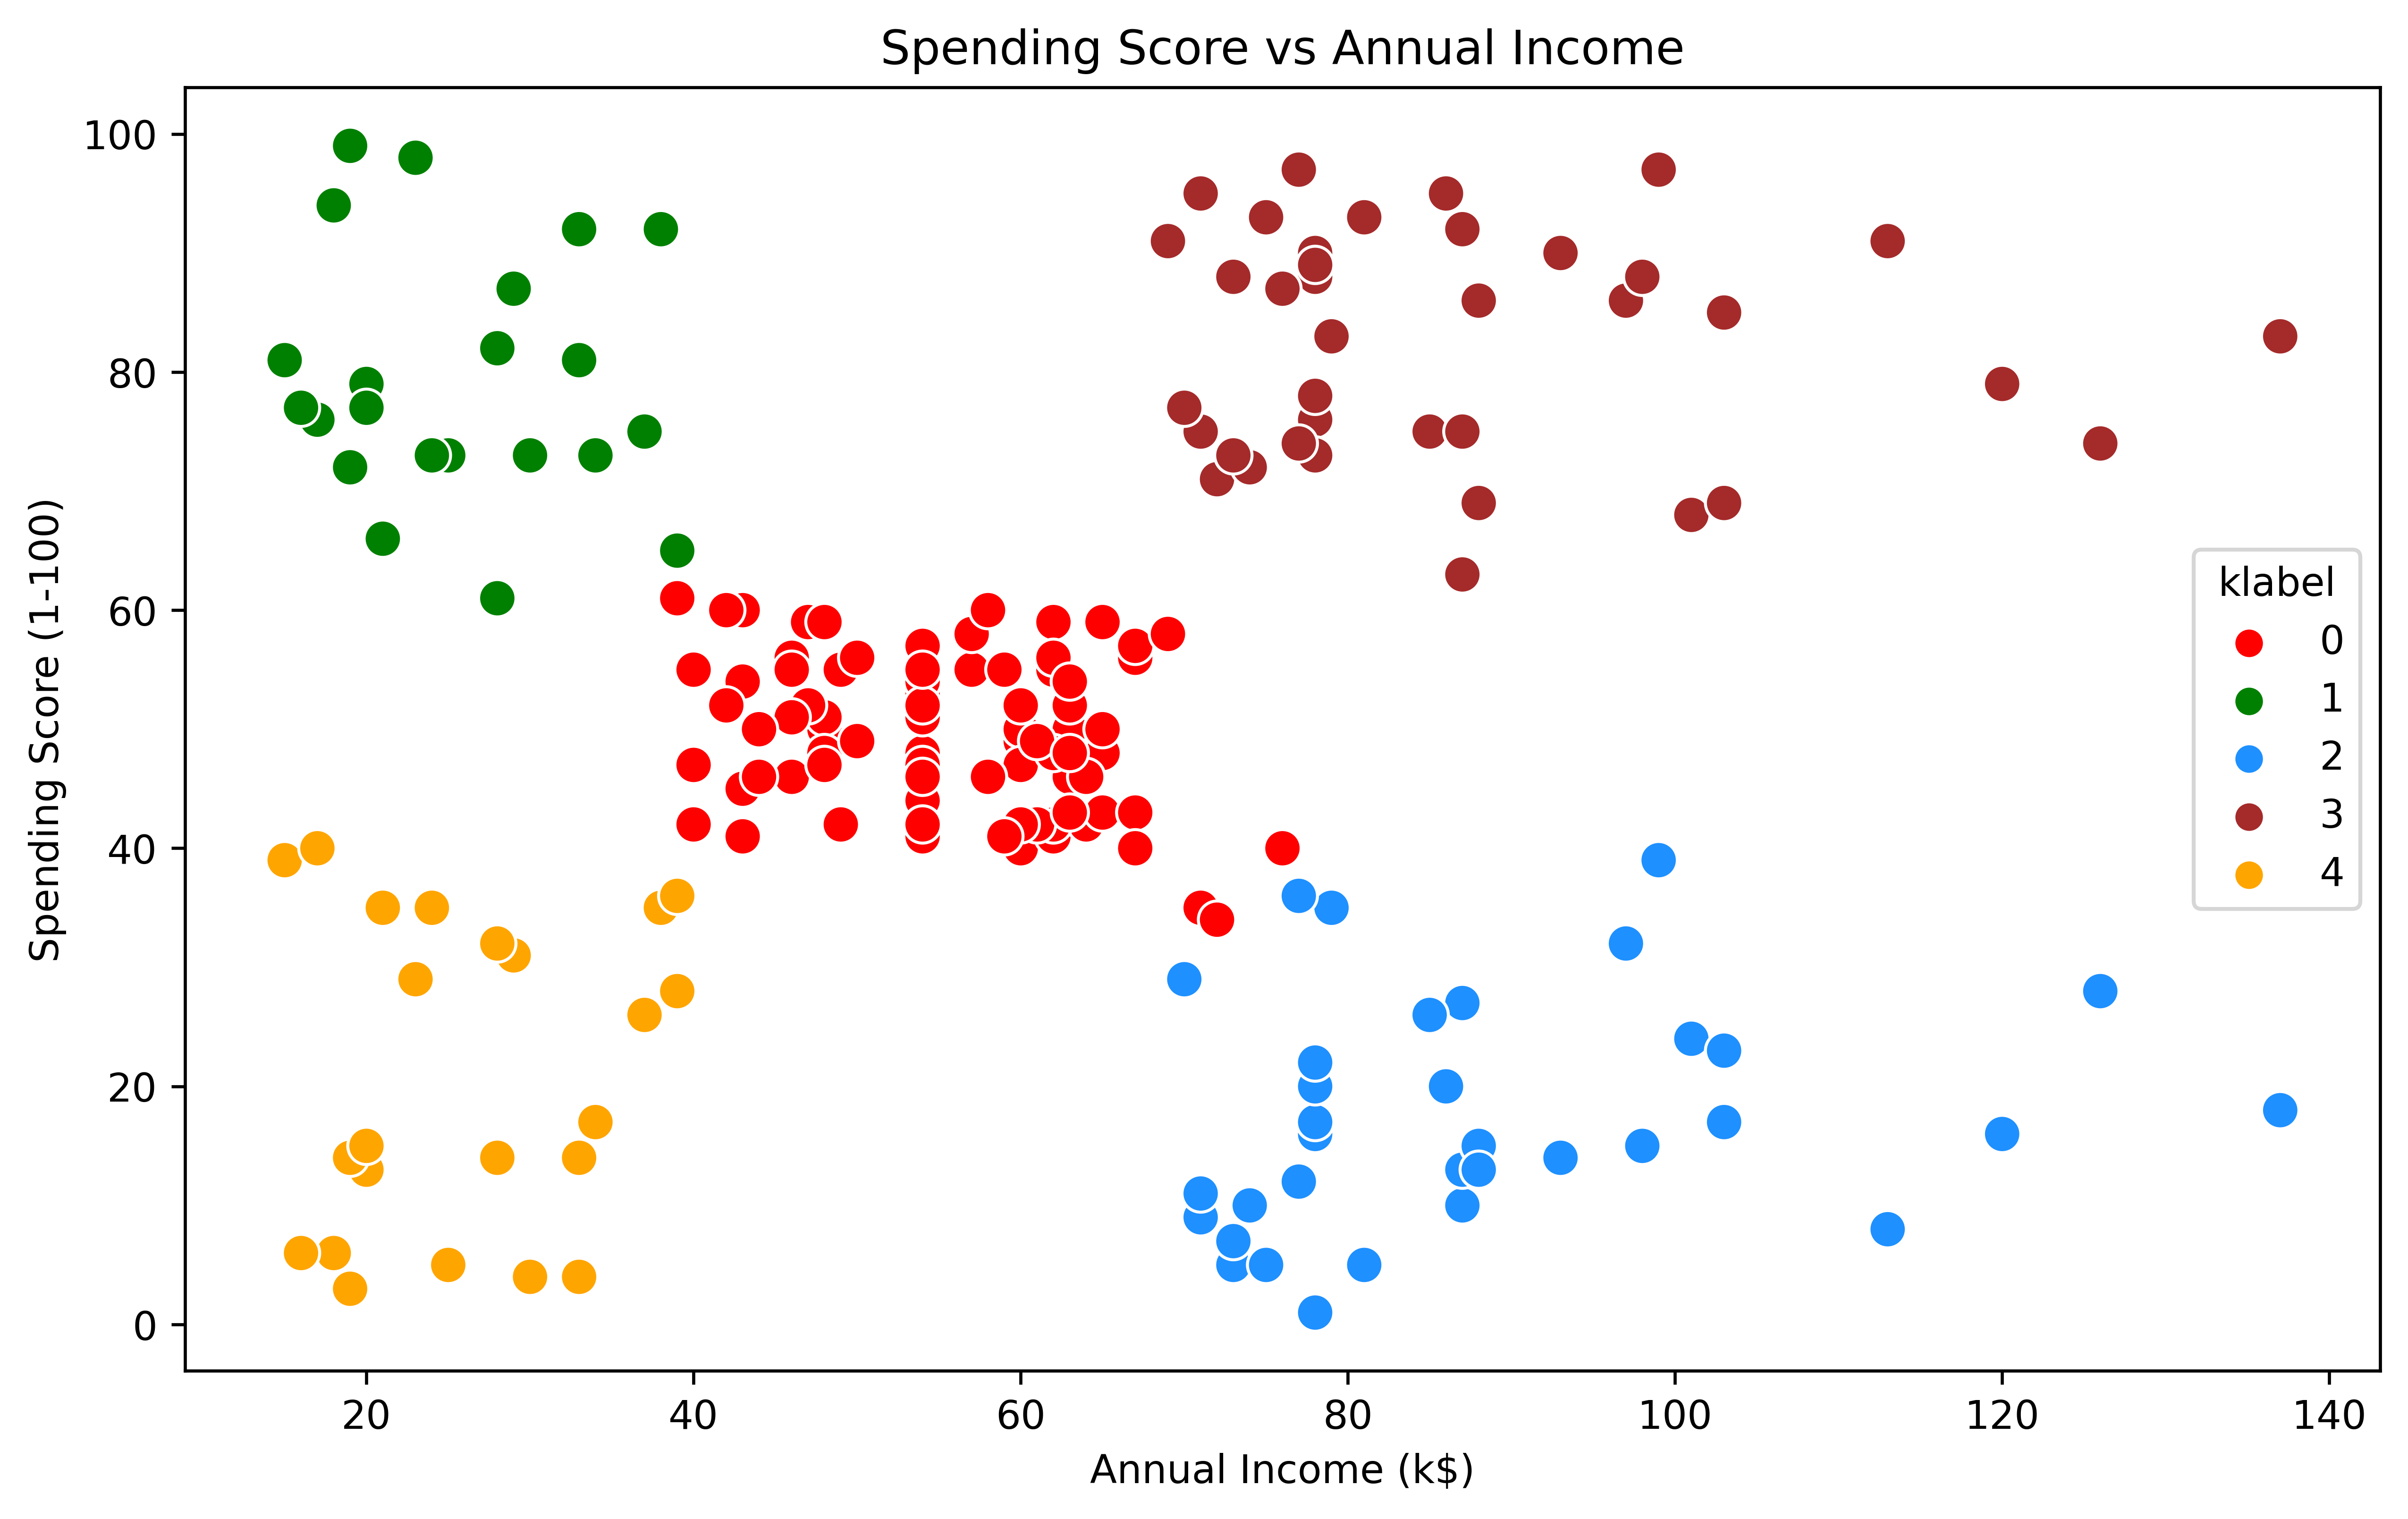

In [67]:
plt.figure(figsize=(10,6), dpi = 600)
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="klabel",  
                 palette=['red','green','dodgerblue','brown','orange'], legend='full',data = data  ,s = 90 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score vs Annual Income')
plt.grid(False)
plt.show()

#### Plotting Scaterplot of Clusters With Labels Marked (Showing Centroids)

In [68]:
data_2D = np.array(data_2D)

kmeans_model_2D = KMeans(n_clusters = 5).fit(data_2D)

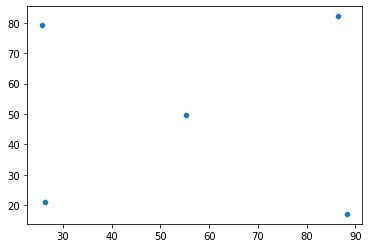

In [69]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D
sns.scatterplot(centroids_2D[:,0], centroids_2D[:,1])
    
centroids_2D = kmeans_model_2D.cluster_centers_ 

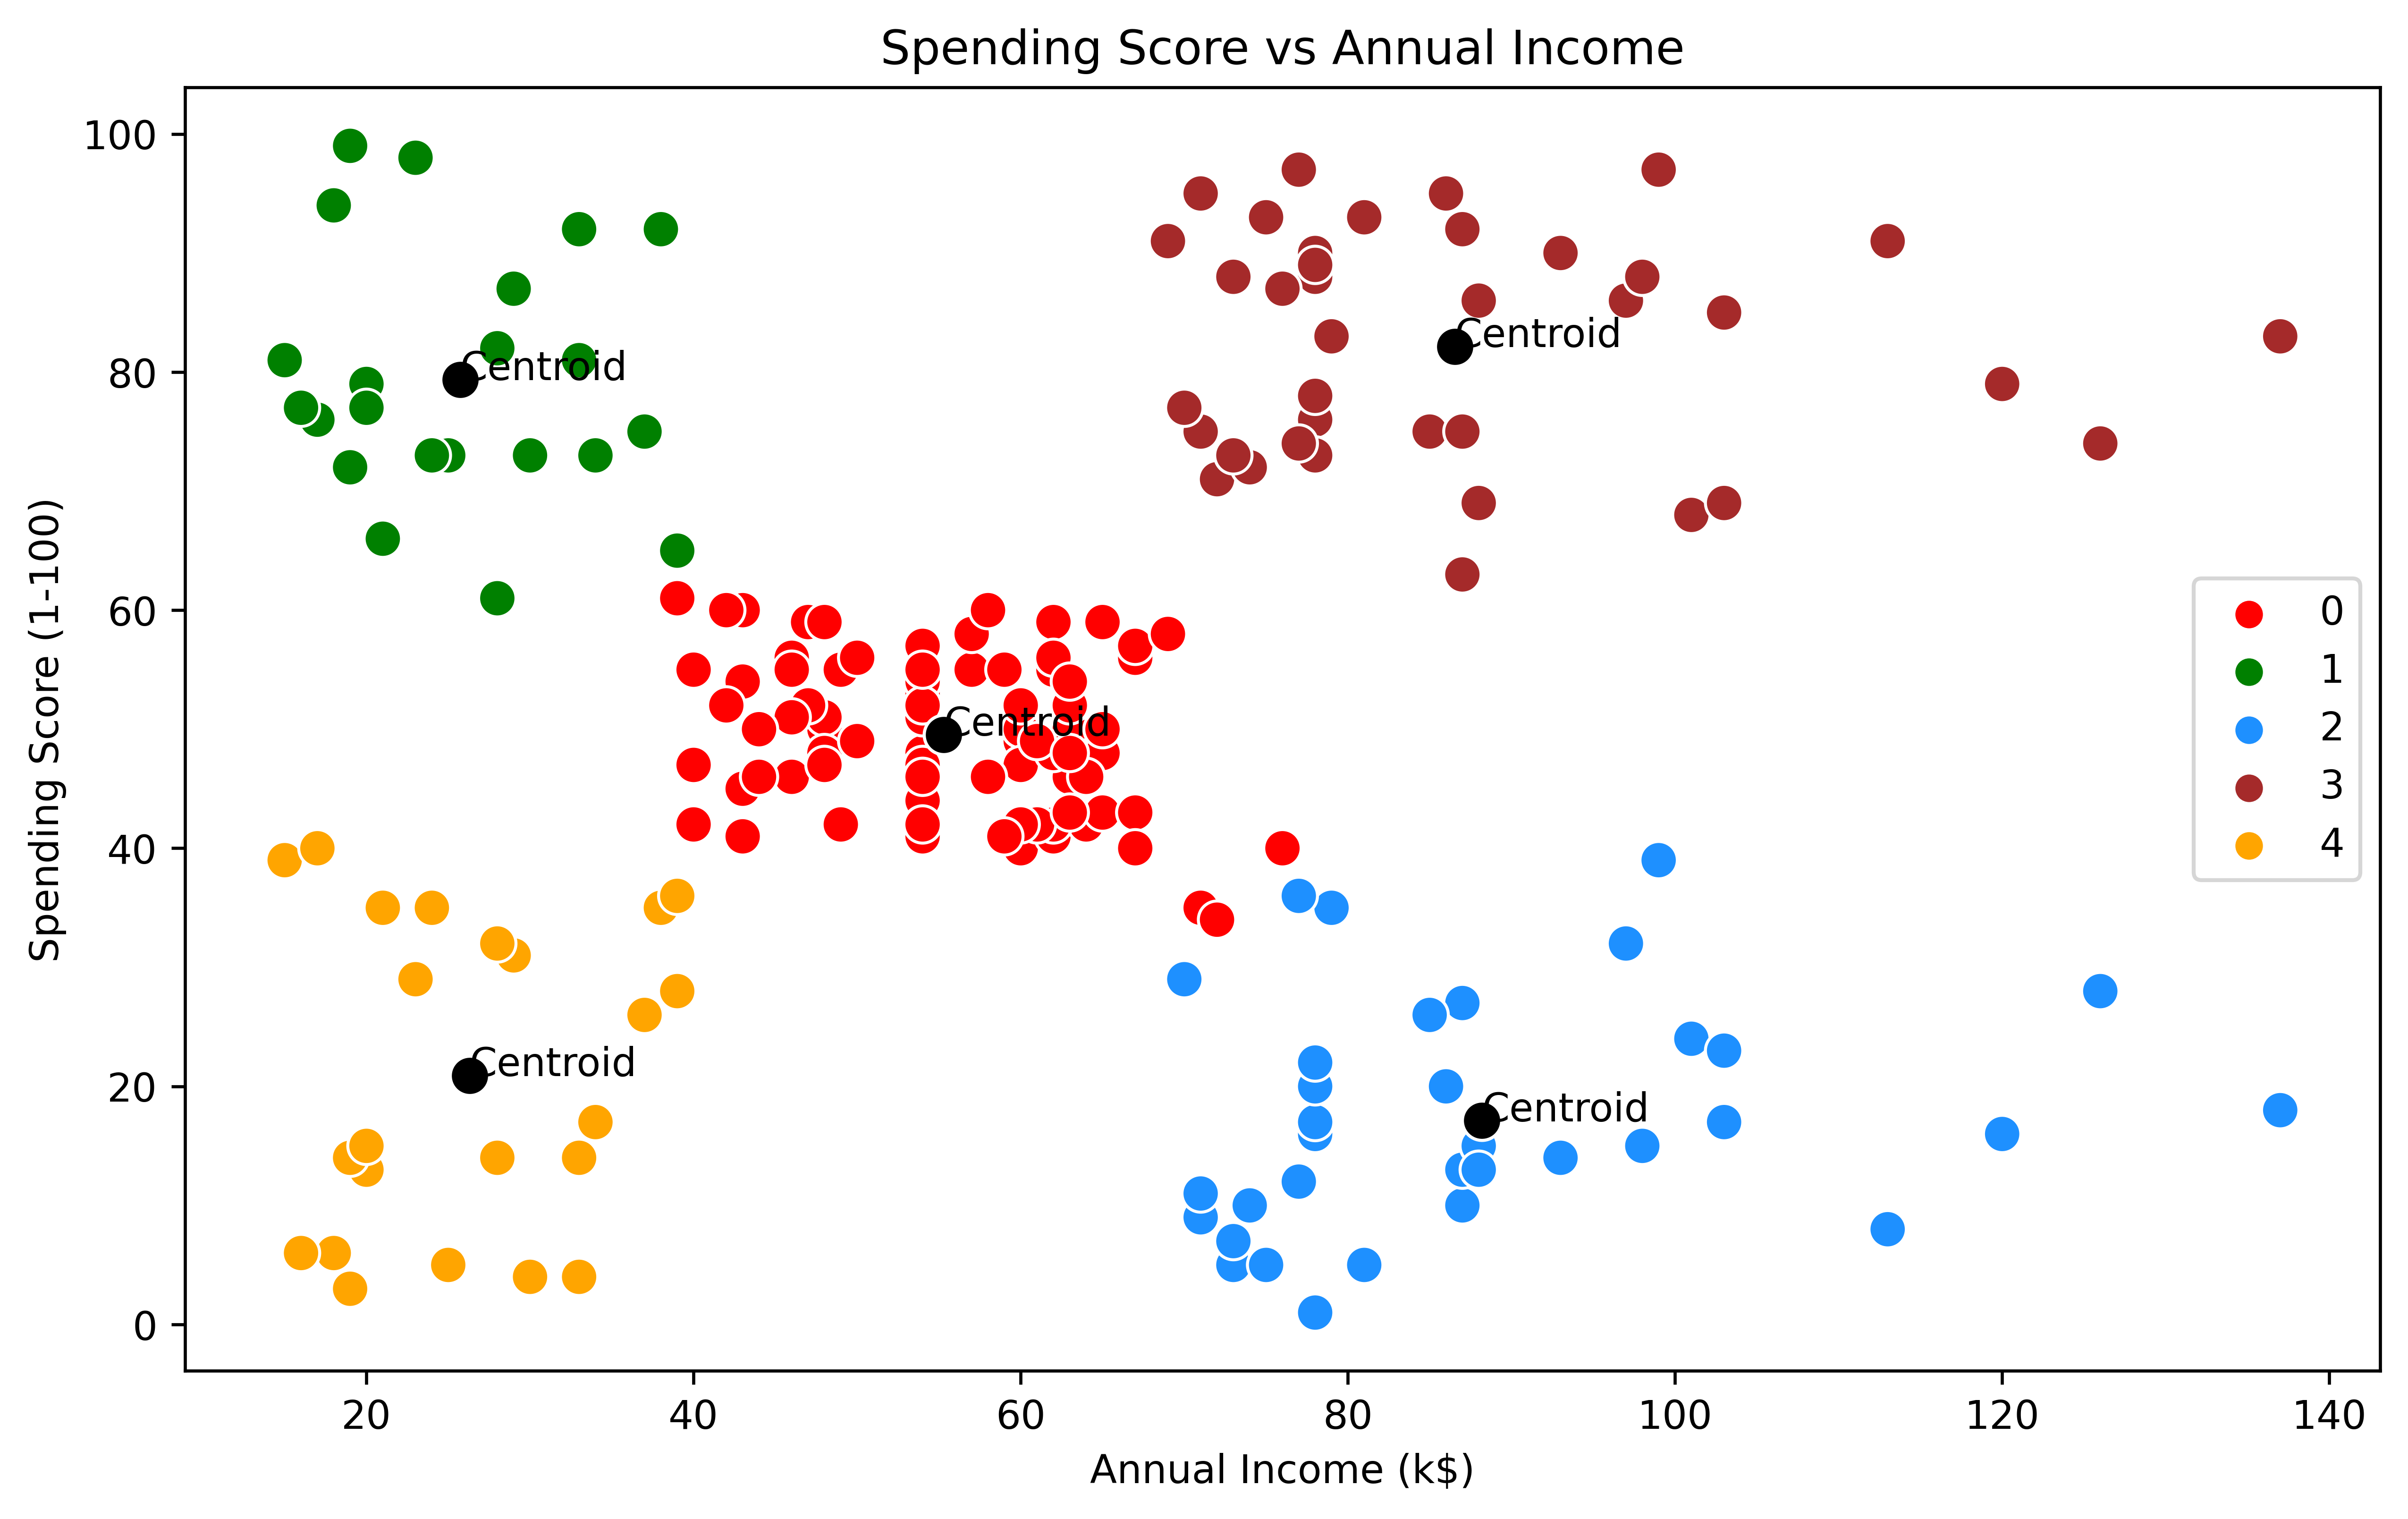

In [70]:
plt.figure(figsize=(10,6), dpi = 600)
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="klabel",  
                 palette=['red','green','dodgerblue','brown','orange'], legend='full',data = data ,s = 90 )

sns.scatterplot(centroids_2D[:,0], centroids_2D[:,1], color ='black', s=100)

for i in range(len(centroids_2D)):
    plt.annotate('Centroid', (centroids_2D[i][0], centroids_2D[i][1]), fontsize=10)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score vs Annual Income')
plt.grid(False)
plt.show()


-------------------------------------------------------------------------------------------------------------------------------

### Age vs Spending Scores

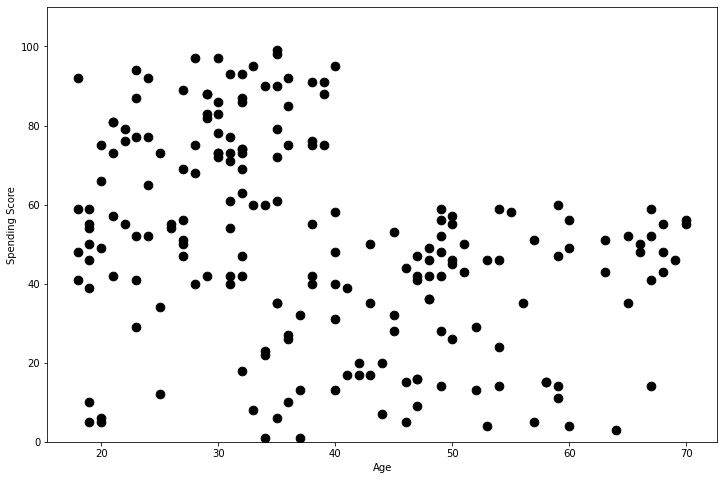

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data['Age'], data['Spending Score (1-100)'], s=75, color = 'black')
plt.ylim(0,110)
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.show()

#### *Comment:*
#### Difficult to predict the number of clusters in this case by ourselves
##### Now by checking using Elbow Method to get the optimal value of K

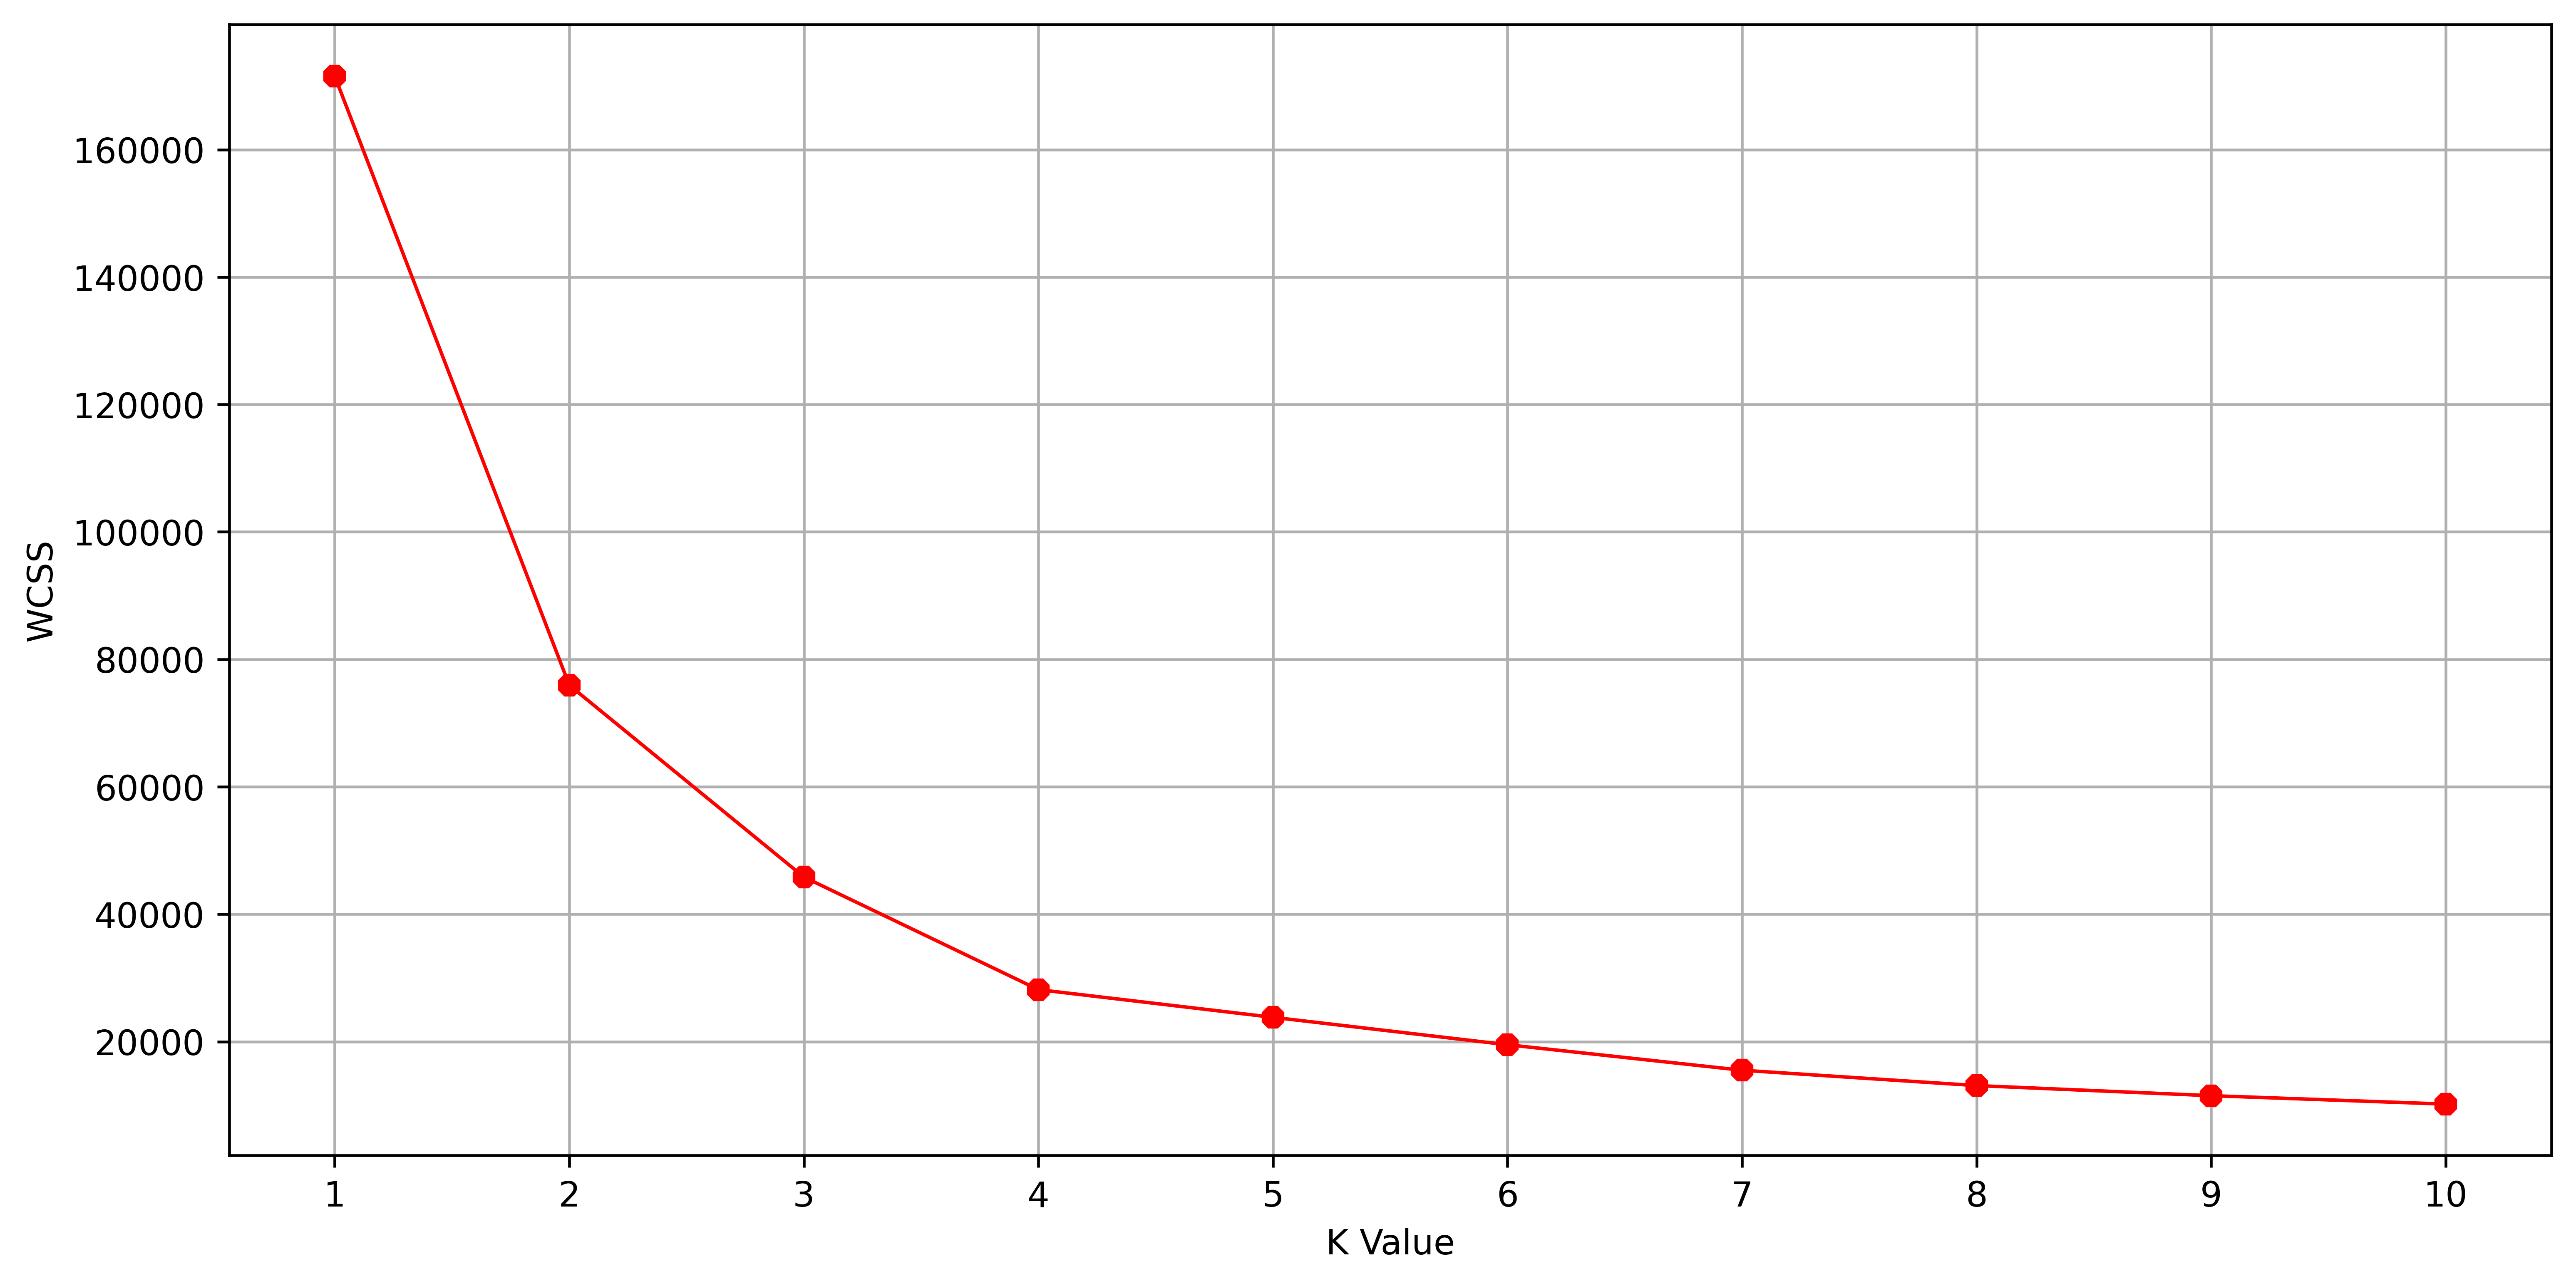

In [72]:
data_2D1 = data[['Age', 'Spending Score (1-100)']]

from sklearn.cluster import KMeans
wcss = []
#Assuming for this the value of K stays in or between 1 and 11
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(data_2D1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6), dpi = 600)    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [73]:
data_2D1 = data[['Age', 'Spending Score (1-100)']]


for n in range(2,11):
    km = KMeans(n_clusters=n, random_state = 10)
    y_pred=km.fit_predict(data_2D1)
    print(f"For K value of {n} the Silhouette Score is {metrics.silhouette_score(data_2D1, y_pred)}")

For K value of 2 the Silhouette Score is 0.4692341232501655
For K value of 3 the Silhouette Score is 0.4530012701652126
For K value of 4 the Silhouette Score is 0.49973941540141753
For K value of 5 the Silhouette Score is 0.4614660306562775
For K value of 6 the Silhouette Score is 0.446619017091555
For K value of 7 the Silhouette Score is 0.42313509747504796
For K value of 8 the Silhouette Score is 0.4341080043562947
For K value of 9 the Silhouette Score is 0.41665349678786284
For K value of 10 the Silhouette Score is 0.410335701669009


#### Silhouette scores are below 50% in this graphical combination, however proceeding with with K =4 since its very close to 0.50

In [74]:
#From the Elbow graph, the optimal value for K is 4
km = KMeans(n_clusters=4)
#Fitting the input data
km.fit(data_2D1)
#predicting the labels of the input data
y_pred=km.predict(data_2D1)
#adding the labels to a column named label
data["klabel"] = y_pred
#The new dataframe with the clustering done
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),klabel
0,9,Male,64,19,3,0
1,66,Male,18,48,59,3
2,29,Female,40,29,31,0
3,173,Male,36,87,10,0
4,41,Female,65,38,35,2


#### Plotting Scaterplot of Clusters With Labels Marked (Showing Centroids)

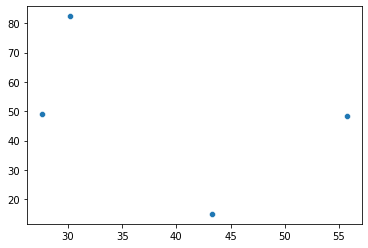

In [75]:
data_2D1 = np.array(data_2D1)

kmeans_model_2D = KMeans(n_clusters = 4, random_state = 10).fit(data_2D1)
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D
sns.scatterplot(centroids_2D[:,0], centroids_2D[:,1])
    
centroids_2D = kmeans_model_2D.cluster_centers_ 


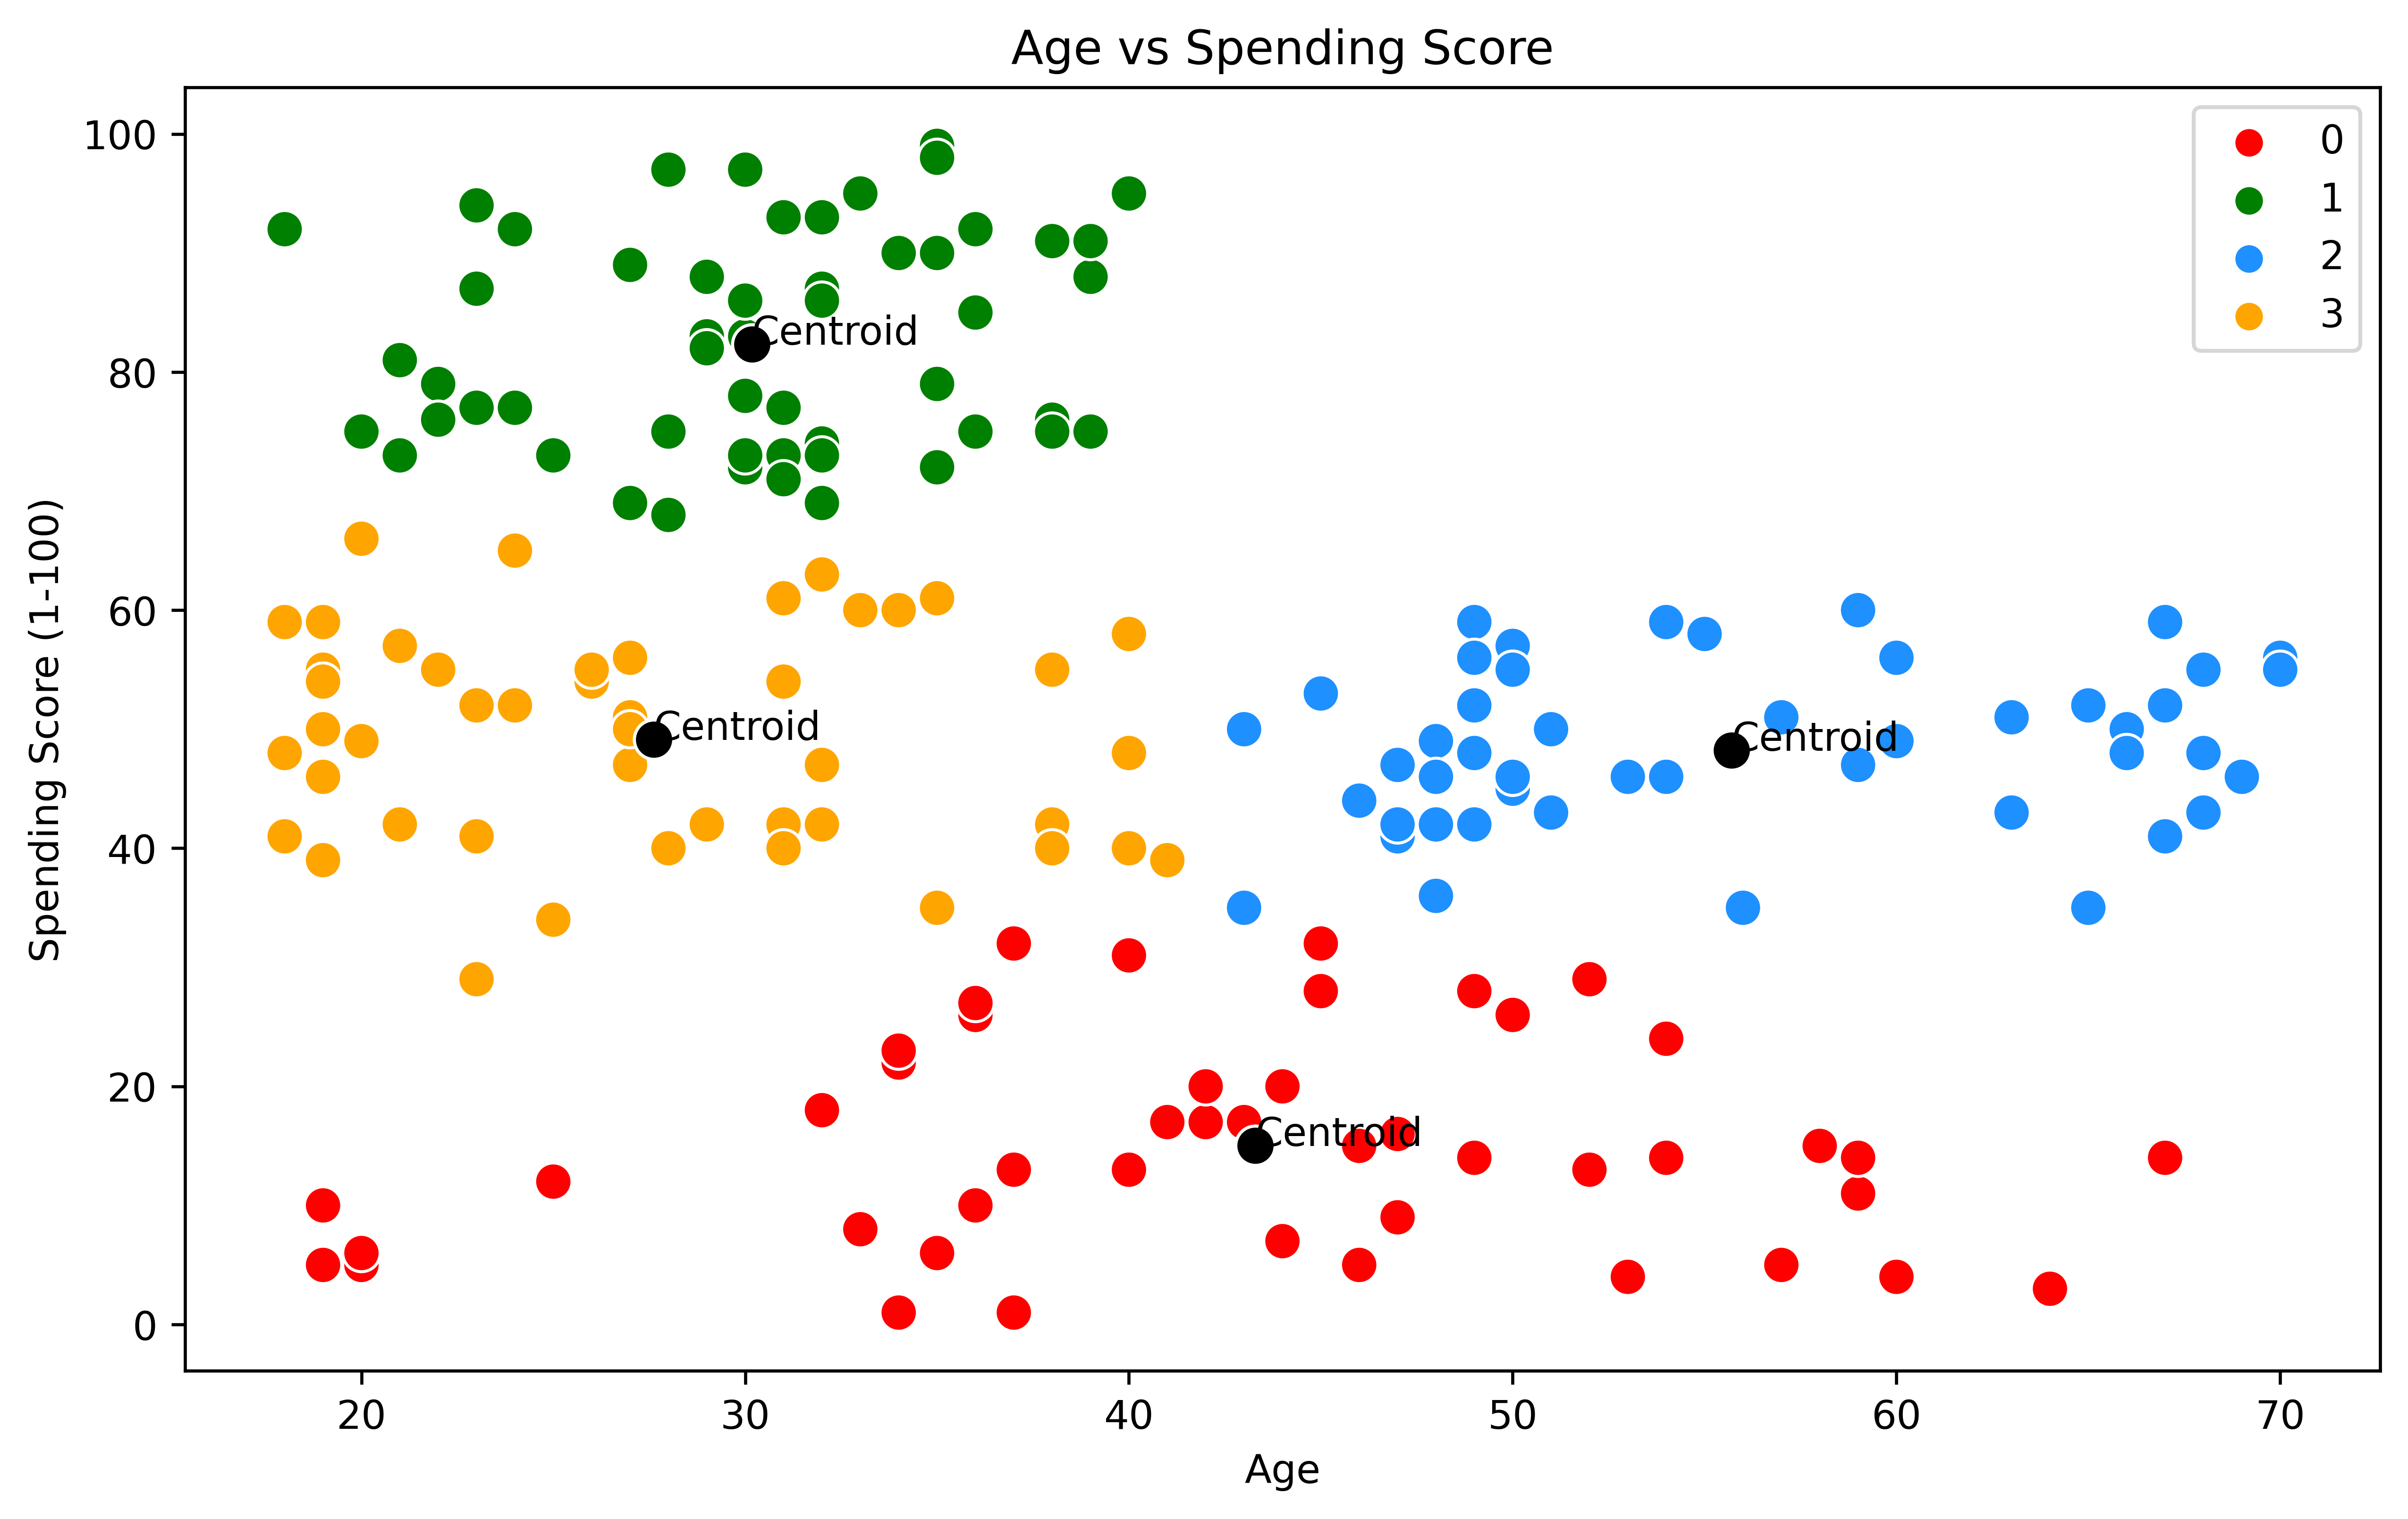

In [76]:
plt.figure(figsize=(10,6), dpi=600)
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="klabel",  
                 palette=['red','green','dodgerblue', 'orange'], legend='full',data = data  ,s = 90 )

sns.scatterplot(centroids_2D[:,0], centroids_2D[:,1], color ='black', s=100)

for i in range(len(centroids_2D)):
    plt.annotate('Centroid', (centroids_2D[i][0], centroids_2D[i][1]), fontsize=10)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### Multivariable Clustering

#### 3-D Plot considering age as a Z-Axis

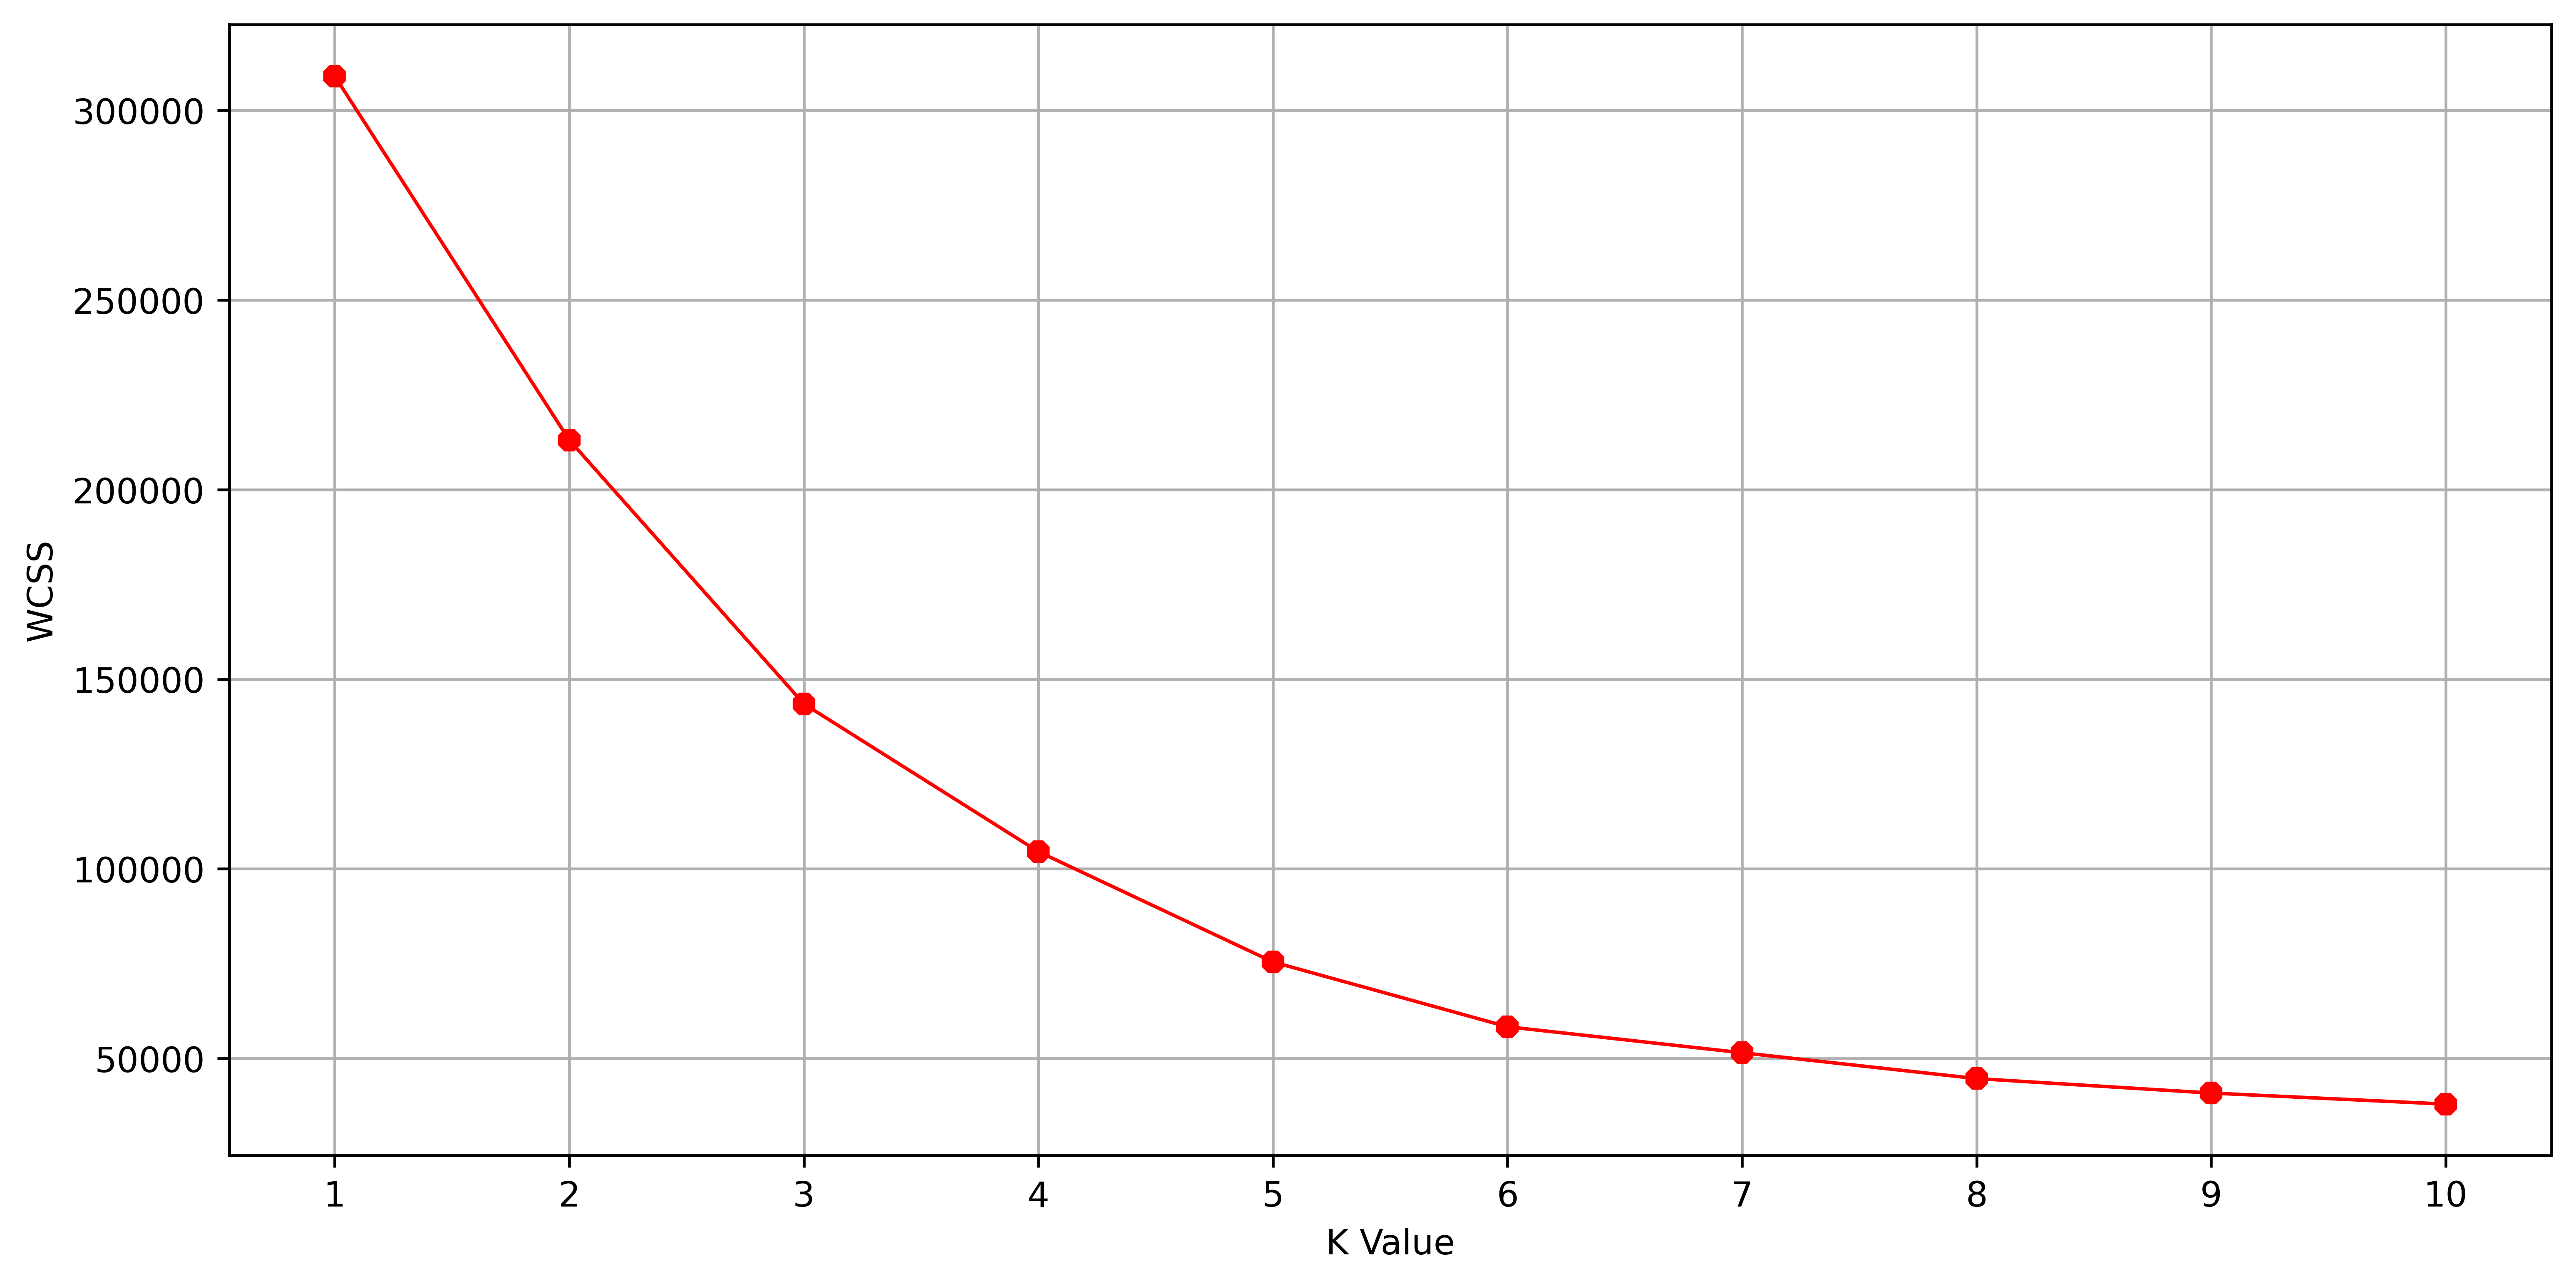

In [77]:
data_3D = data.iloc[:,2:]

from sklearn.cluster import KMeans
wcss = []
#Assuming for this the value of K stays in or between 1 and 11
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(data_3D)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6), dpi = 600)    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [78]:
for n in range(2,11):
    km = KMeans(n_clusters=n, random_state = 10)
    y_pred=km.fit_predict(data_3D)
    print(f"For K value of {n} the Silhouette Score is {metrics.silhouette_score(data_3D, y_pred)}")

For K value of 2 the Silhouette Score is 0.292951849004976
For K value of 3 the Silhouette Score is 0.3838825257459918
For K value of 4 the Silhouette Score is 0.40532684388683526
For K value of 5 the Silhouette Score is 0.44455688543165084
For K value of 6 the Silhouette Score is 0.4526090303297071
For K value of 7 the Silhouette Score is 0.441460009147751
For K value of 8 the Silhouette Score is 0.42819591750957686
For K value of 9 the Silhouette Score is 0.4075409336421039
For K value of 10 the Silhouette Score is 0.3827739785863757


In [79]:
#From the Elbow graph, taking K=6
from sklearn import metrics
km = KMeans(n_clusters=6)
#Fitting the input data
km.fit(data.iloc[:,2:])
#predicting the labels of the input data
y=km.predict(data.iloc[:,2:])
#adding the labels to a column named label
data["klabel"] = y
#The new dataframe with the clustering done
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),klabel
0,9,Male,64,19,3,5
1,66,Male,18,48,59,2
2,29,Female,40,29,31,5
3,173,Male,36,87,10,0
4,41,Female,65,38,35,1


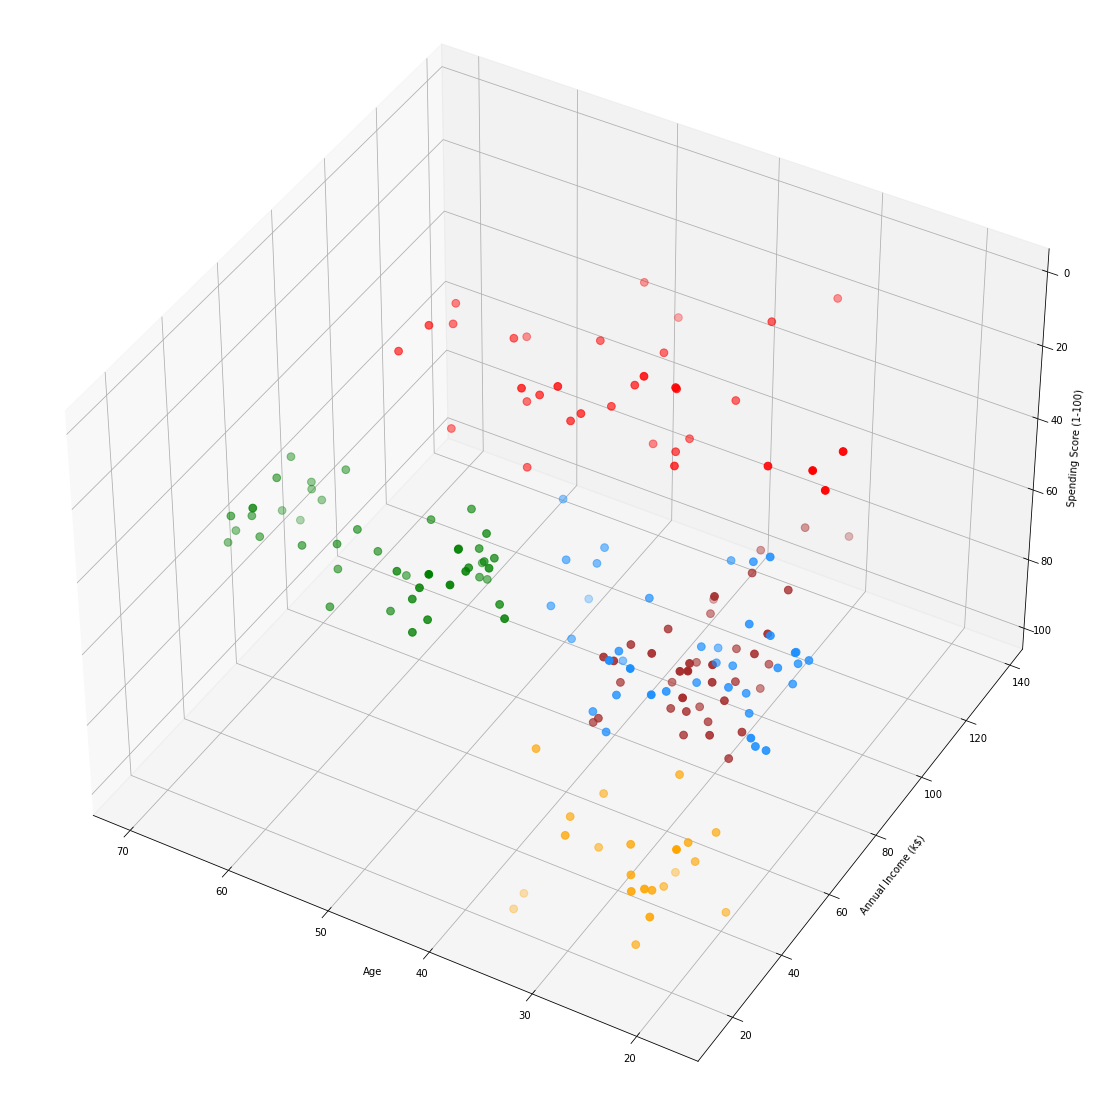

In [80]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.klabel == 0], data["Annual Income (k$)"][data.klabel == 0], 
           data["Spending Score (1-100)"][data.klabel == 0], c='red', s=60)
ax.scatter(data.Age[data.klabel == 1], data["Annual Income (k$)"][data.klabel == 1], 
           data["Spending Score (1-100)"][data.klabel == 1], c='green', s=60)
ax.scatter(data.Age[data.klabel == 2], data["Annual Income (k$)"][data.klabel == 2], 
           data["Spending Score (1-100)"][data.klabel == 2], c='dodgerblue', s=60)
ax.scatter(data.Age[data.klabel == 3], data["Annual Income (k$)"][data.klabel == 3], 
           data["Spending Score (1-100)"][data.klabel == 3], c='brown', s=60)
ax.scatter(data.Age[data.klabel == 4], data["Annual Income (k$)"][data.klabel == 4], 
           data["Spending Score (1-100)"][data.klabel == 4], c='orange', s=60)
ax.view_init(-140, 60)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()